In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df.head(9)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30


In [3]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [4]:
df.columns = ['suhteellinen kompaktius', 'pinta-ala', 'seinän pinta-ala', 'katto-alue', 'kokonaiskorkeus', 'suuntautuminen', 'lasitusalue', 'lasitusalueen jakauma', 'lämmityskuorma', 'jäähdytyskuorma']
df.columns

Index(['suhteellinen kompaktius', 'pinta-ala', 'seinän pinta-ala',
       'katto-alue', 'kokonaiskorkeus', 'suuntautuminen', 'lasitusalue',
       'lasitusalueen jakauma', 'lämmityskuorma', 'jäähdytyskuorma'],
      dtype='object')

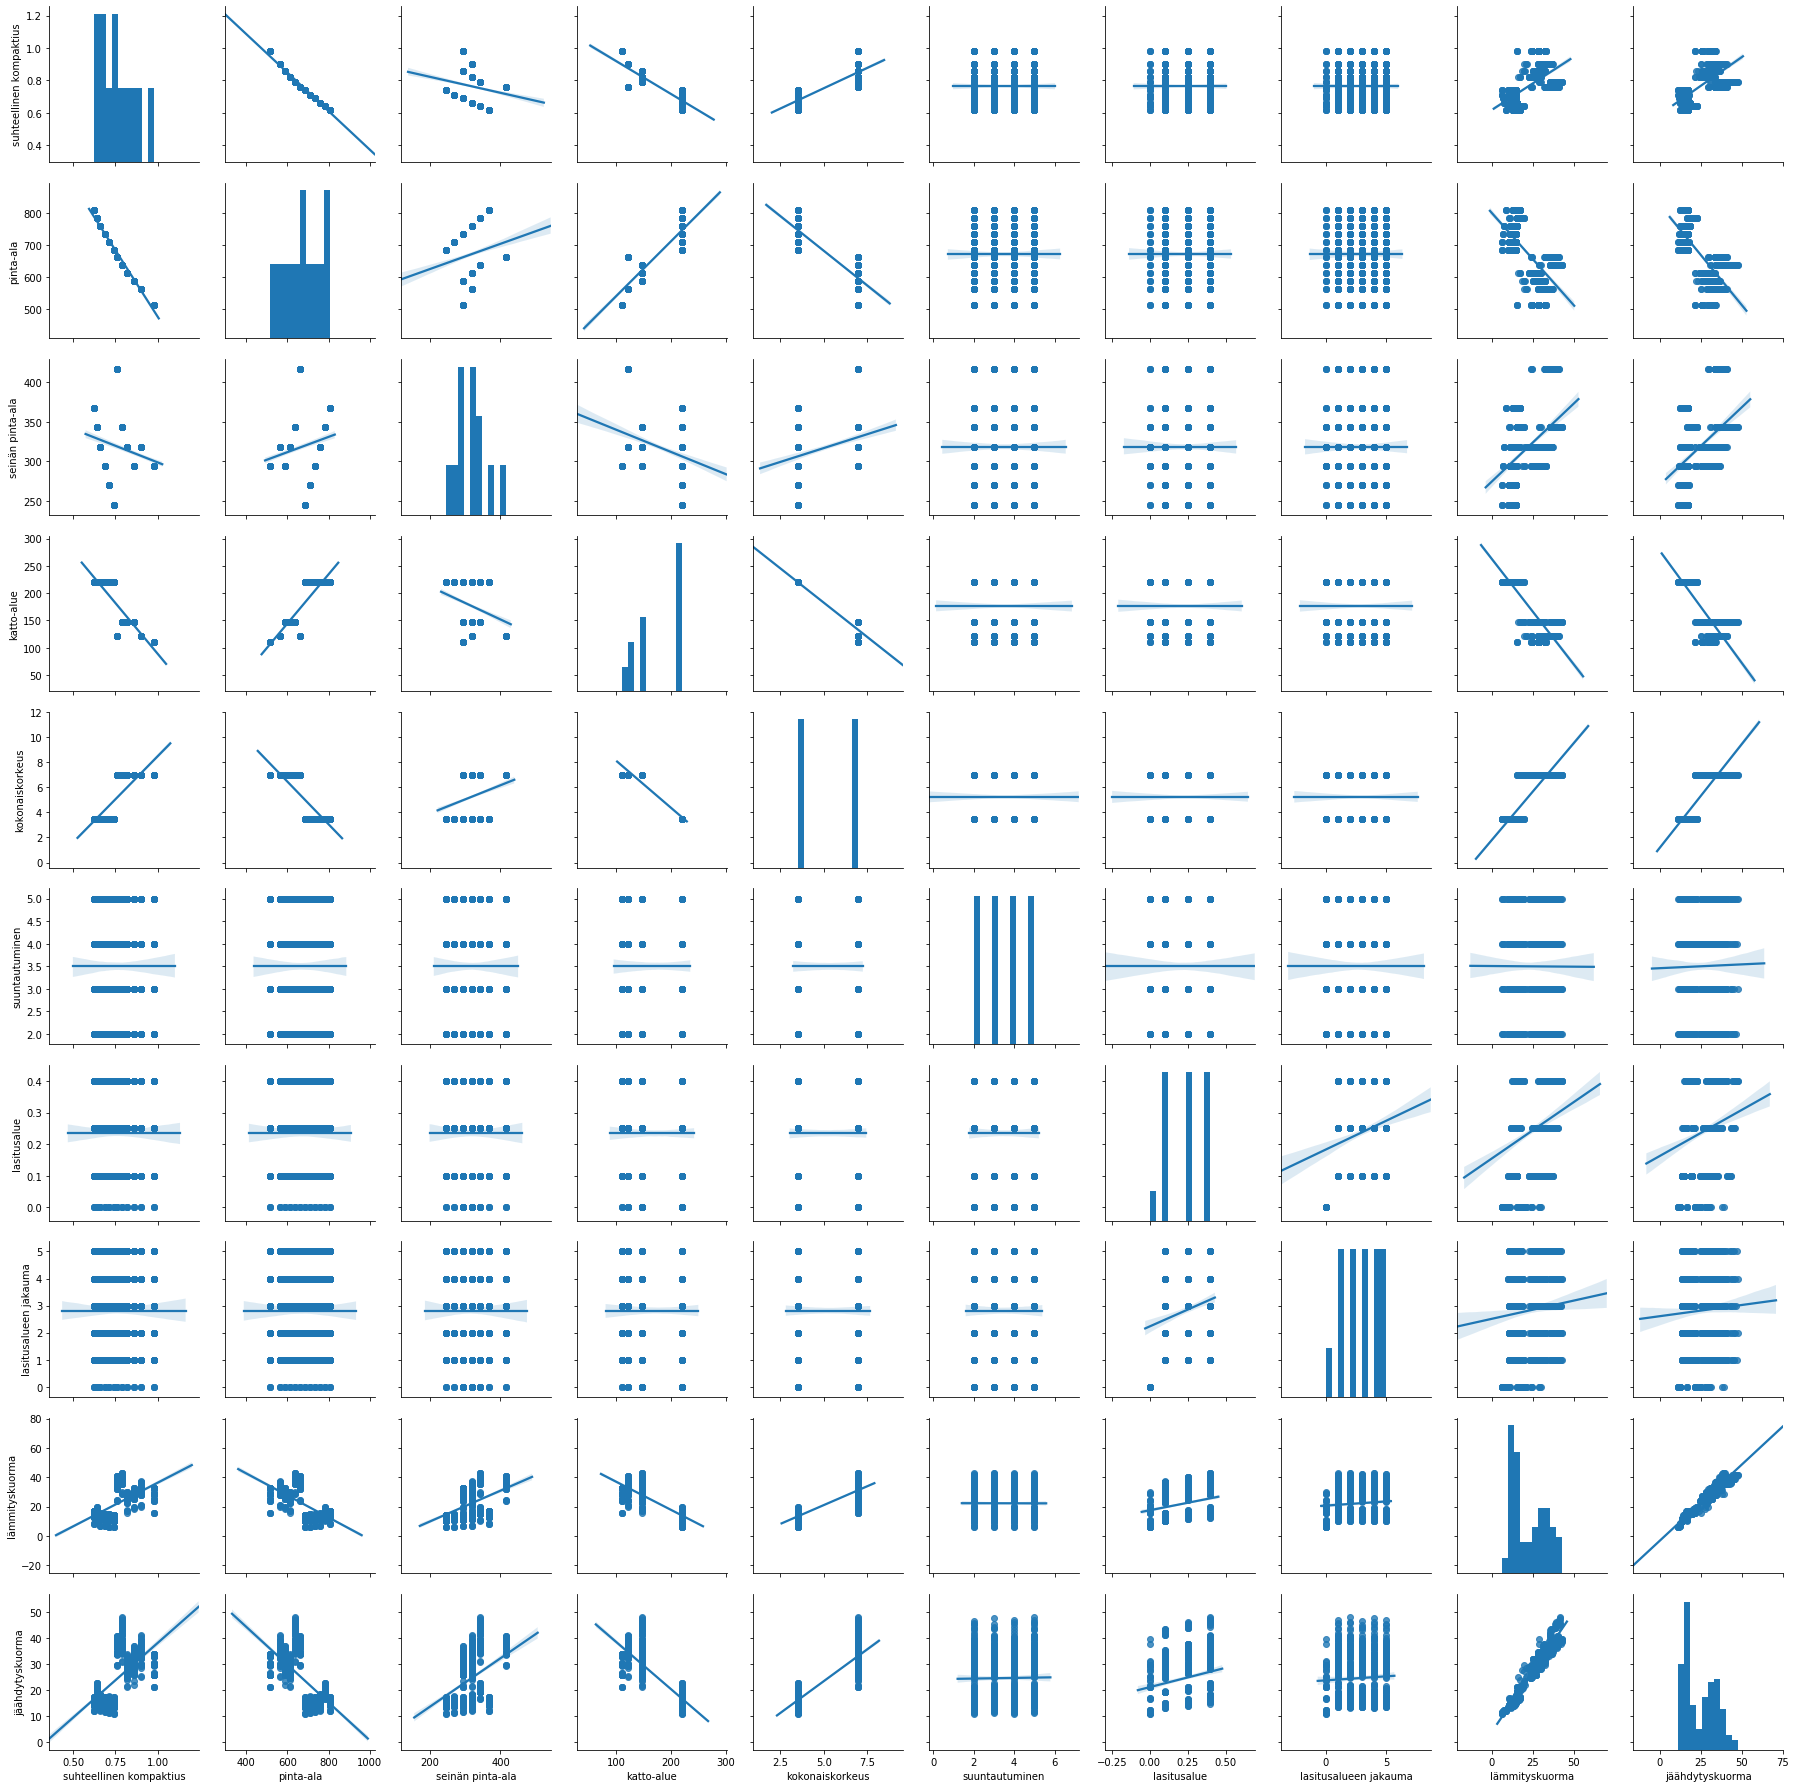

In [5]:
sns.pairplot(df, kind='reg')

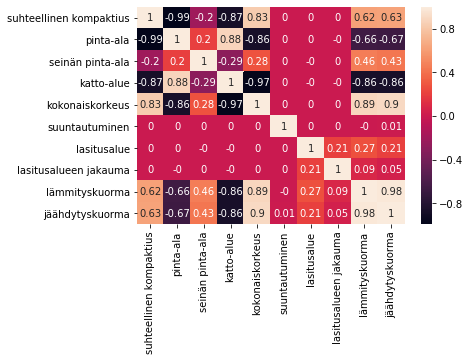

In [6]:
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
X = df[['pinta-ala', 'seinän pinta-ala', 'kokonaiskorkeus']]
y = df[['lämmityskuorma']]

In [8]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression().fit(X,y)

In [9]:
malli.coef_

array([[0.01538363, 0.03694497, 5.53041101]])

In [10]:
malli.intercept_

array([-28.82774612])

In [11]:
malli.score(X,y)

0.8380748695335763

Text(0, 0.5, 'Poikkeama todellisesta')

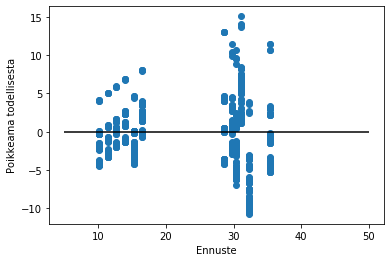

In [12]:
plt.scatter(malli.predict(X), malli.predict(X)-y)

plt.hlines(y=0,xmin=5,xmax=50)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')